# Lecture Week 8 Wed 11/20

<Axes: >

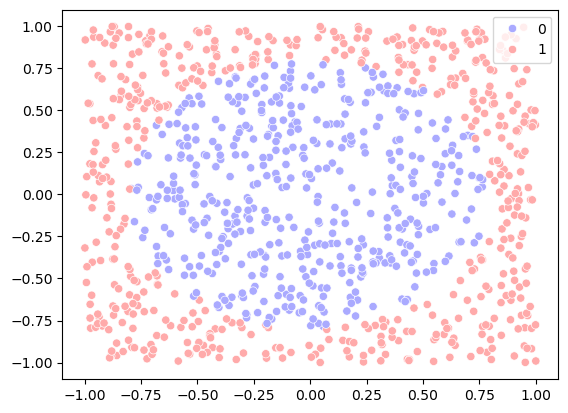

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay


# Step 1: Generate data
np.random.seed(0)
n_samples = 1000

x1 = np.random.uniform(-1, 1, n_samples)
x2 = np.random.uniform(-1, 1, n_samples)
X = np.vstack((x1, x2)).T
y = (x1**2 + x2**2 > 2/np.pi).astype(int)

# Step 2: Visualize the data
sns.scatterplot(x=x1, y=x2, hue=y, palette='bwr')


Accuracy: 0.442


<Figure size 640x480 with 0 Axes>

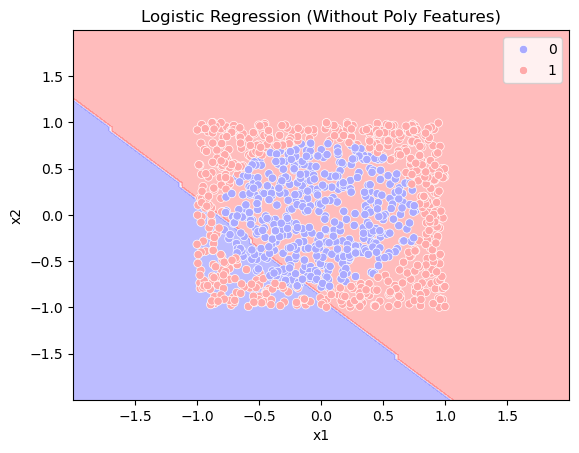

In [2]:
# Step 3: Logistic regression without polynomial features
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 4: Plot decision boundary (without polynomial features)
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict", alpha=0.3, cmap='bwr')
sns.scatterplot(x=x1, y=x2, hue=y, palette='bwr')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Logistic Regression (Without Poly Features)")

acc = model.score(X, y)
print(f"Accuracy: {acc}")

In this example, the two classes are separated by a circle in the plane $x_1$ and $x_2$. But logistic regression only can separate the two classes by a straight line. 

In this case, including $x_1^2$ and $x_2^2$ in the feature vector, we can separate the two classes by a straight line based on the distance from the origin $r^2 = x_1^2 + x_2^2$.

In general, we can lift the data to a higher dimension (creating more features), and the data might be linearly separable in the higher dimension.


In [3]:
X_poly = np.vstack((x1, x2, x1**2, x2**2)).T

model_poly = LogisticRegression()
model_poly.fit(X_poly, y)
y_poly_pred = model_poly.predict(X_poly)

acc = model_poly.score(X_poly, y)
print(f"Accuracy: {acc}")

model_poly.coef_

Accuracy: 0.992


array([[0.15417692, 0.16063529, 8.41092452, 8.38929689]])

## Clustering

see notes on [kmeans](../notes/kmeans.ipybn).